## 1. Importing important libraries

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing dataset

In [3]:
data1 = pd.read_csv('Company_Data (1).csv',sep=',')
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## 3. Data understanding

In [5]:
data1.shape

(400, 11)

In [7]:
data1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
data1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

## 4.Data Preparation

In [9]:
data1.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [10]:
data1.median()

Sales            7.49
CompPrice      125.00
Income          69.00
Advertising      5.00
Population     272.00
Price          117.00
Age             54.50
Education       14.00
dtype: float64

In [11]:
## changing the sales caloumn to categorical coulumn by using median (7.49) as threshold
b =[]
for itr in data1['Sales']:
    if itr <= 7.49:
        b.append('Low sales')
    else:
        b.append('High Sales')
print(b)

['High Sales', 'High Sales', 'High Sales', 'Low sales', 'Low sales', 'High Sales', 'Low sales', 'High Sales', 'Low sales', 'Low sales', 'High Sales', 'High Sales', 'Low sales', 'High Sales', 'High Sales', 'High Sales', 'High Sales', 'High Sales', 'High Sales', 'High Sales', 'Low sales', 'High Sales', 'Low sales', 'Low sales', 'High Sales', 'High Sales', 'High Sales', 'Low sales', 'Low sales', 'High Sales', 'High Sales', 'High Sales', 'Low sales', 'High Sales', 'Low sales', 'High Sales', 'High Sales', 'Low sales', 'Low sales', 'Low sales', 'Low sales', 'High Sales', 'High Sales', 'Low sales', 'Low sales', 'Low sales', 'High Sales', 'Low sales', 'Low sales', 'High Sales', 'Low sales', 'Low sales', 'High Sales', 'Low sales', 'Low sales', 'Low sales', 'High Sales', 'Low sales', 'Low sales', 'Low sales', 'High Sales', 'Low sales', 'Low sales', 'High Sales', 'High Sales', 'Low sales', 'High Sales', 'High Sales', 'High Sales', 'High Sales', 'High Sales', 'Low sales', 'Low sales', 'High Sales'

In [12]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [13]:
data1['sales'] = b

In [14]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low sales
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low sales


In [15]:
del data1['Sales']

In [16]:
le = LabelEncoder()
data1['sales'] = le.fit_transform(data1['sales'])

In [17]:
data1['ShelveLoc'] = le.fit_transform(data1['ShelveLoc'])
data1['Urban'] = le.fit_transform(data1['Urban'])
data1['US'] = le.fit_transform(data1['US'])

In [18]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [19]:
data1.dtypes

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
sales          int32
dtype: object

## 5. Model Building

In [20]:
X = data1.drop('sales',axis=1)
y = data1[['sales']]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=12,stratify=y)

In [22]:
print(x_train.shape)
print(y_train.shape)

(300, 10)
(300, 1)


In [23]:
print(x_test.shape)
print(y_test.shape)

(100, 10)
(100, 1)


## 6. Model Training 

In [24]:
rf_cl = RandomForestClassifier()
rf_cl.fit(x_train,y_train)

<ipython-input-24-029ae055c274>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cl.fit(x_train,y_train)


RandomForestClassifier()

## 7. Model Testing 

In [25]:
y_pred_train = rf_cl.predict(x_train)
y_pred_train

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [26]:
y_pred_test = rf_cl.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

## 8.  Model Evaluation

In [27]:
accuracy_score(y_train,y_pred_train)

1.0

In [28]:
accuracy_score(y_test,y_pred_test)

0.84

In [29]:
precision_score(y_test,y_pred_test)

0.84

In [30]:
recall_score(y_test,y_pred_test)

0.84

In [31]:
confusion_matrix(y_test,y_pred_test)

array([[42,  8],
       [ 8, 42]], dtype=int64)

## To find the attributes causing higher sales

In [33]:
imp_feature = rf_cl.feature_importances_

In [34]:
x_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [35]:
feature_importance = pd.DataFrame({'Features':x_train.columns,'Important Features':imp_feature})
feature_importance

,Features,Important Features
0,CompPrice,0.124215
1,Income,0.106084
2,Advertising,0.123597
3,Population,0.092707
4,Price,0.242521
5,ShelveLoc,0.107742
6,Age,0.116621
7,Education,0.056742
8,Urban,0.015213
9,US,0.014559


In [36]:
## sorting the important features in descending order 
impo_features = feature_importance.sort_values(by='Important Features',axis=0,ascending=False)
impo_features

,Features,Important Features
4,Price,0.242521
0,CompPrice,0.124215
2,Advertising,0.123597
6,Age,0.116621
5,ShelveLoc,0.107742
1,Income,0.106084
3,Population,0.092707
7,Education,0.056742
8,Urban,0.015213
9,US,0.014559


#### Visualizing the important features

Text(0.5, 1.0, 'Feature importance')

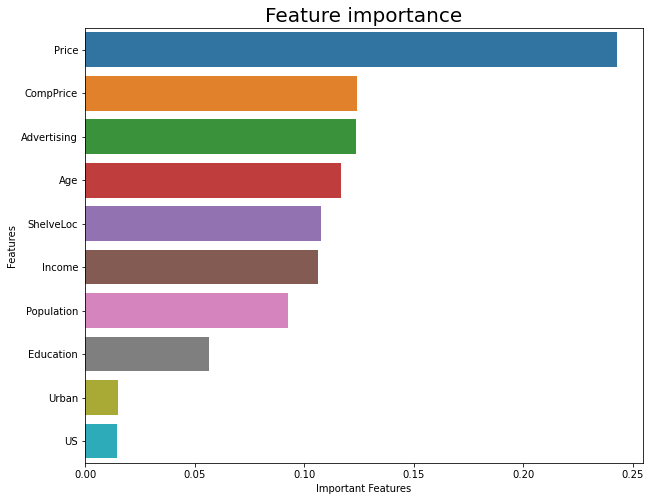

In [37]:
plt.figure(figsize = (10,8))
sns.barplot(x='Important Features',y='Features',data=impo_features)
plt.title('Feature importance',size=20)

## Conclusion

* From above table we can see Price, CompPrice,Advertising, Age and ShelveLoc are top 5 important features which are affecting the sales the most. This means this attributes will be responsible for higher sales as well.
* From the top 5 important features, 'Price' is affecting sales to larger extent.Hence, we can say it is causing the high sales.